# Homework #1: Solutions
## Maximum Likelihood Learning and Bayesian Inference

**AM 207: Advanced Scientific Computing**<br>
**Instructor: Weiwei Pan**<br>
**Fall 2021**

### Instructions:

**Submission Format:** Use this notebook as a template to complete your homework. Please intersperse text blocks (using Markdown cells) amongst `python` code and results -- format your submission for maximum readability. Your assignments will be graded for correctness as well as clarity of exposition and presentation -- a “right” answer by itself without an explanation or is presented with a difficult to follow format will receive no credit.

**Code Check:** Before submitting, you must do a "Restart and Run All" under "Kernel" in the Jupyter or colab menu. Portions of your submission that contains syntactic or run-time errors will not be graded.

**Libraries and packages:** Unless a problems specifically asks you to implement from scratch, you are welcomed to use any `python` library package in the standard Anaconda distribution.

In [38]:
### Import basic libraries
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Problem Description
In the competitive rubber chicken retail market, the success of a company is built on satisfying the exacting standards of a consumer base with refined and discriminating taste. In particular, customer product reviews are all important. But how should we judge the quality of a product based on customer reviews?

On Amazon, the first customer review statistic displayed for a product is the ***average rating***. The following are the main product pages for two competing rubber chicken products, manufactured by Lotus World and Toysmith respectively:


Lotus World |  Toysmith
- |  - 
![alt](lotus1.png) |  ![alt](toysmith1.png)

Clicking on the 'customer review' link on the product pages takes us to a detailed break-down of the reviews. In particular, we can now see the number of times a product is rated a given rating (between 1 and 5 stars).

Lotus World |  Toysmith
- |  - 
![alt](lotus2.png) |  ![alt](toysmith2.png)


In the following, we will ask you to build statistical models to compare these two products using the observed rating. Larger versions of the images are available in the data set accompanying this notebook.

## Part I: A Maximum Likelihood Model
1. **(Model Building)** Suppose that for each product, we can model the probability of the value each new rating as the following vector:
$$
\theta = [\theta_1, \theta_2, \theta_3, \theta_4, \theta_5]
$$
  where $\theta_i$ is the probability that a given customer will give the product $i$ number of stars. That is, each new rating (a value between 1 and 5) has a categorical distribution $Cat(\theta)$. Write down the likelihood for the observed ratings of an Amazon product -- represent the observed ratings as a vector $R = [r_1, r_2, r_3, r_4, r_5]$ where, for example, $r_4$ is the number of $4$-star reviews out of a total of $N$ ratings.

  **Note:** The observed ratings for each product should be read off the image files included in the dataset.
  
**Solution:** If each rating is distributed as a Categorical, then if we have $N$ number of independent observations of ratings and count up the total number $r_i$ for each star, then $R = [r_1, r_2, r_3, r_4, r_5]$ is distributed as a multinomial variable. That is, the likelihood for $R$ is 
$$
\mathcal{L}(\theta) = \underbrace{\frac{n!}{r_1!\ldots r_5!} \theta_1^{r_1}\ldots \theta_5^{r_5}}_{\text{multinomial pdf}}
$$

For Lotus, we estimate that the observed ratings vector is $[10 6 10 28 109]$ (depending on how you round, you might get a slightly different vector). Thus, the likelihood is
$$
\mathcal{L}_{\text{lotus}}(\theta) = \frac{n!}{10!6!10!27!109!} \theta_1^{10}\theta_2^{6}\theta_3^{10}\theta_4^{28}\theta_5^{109}.
$$

For Toysmith, we estimate that the observed ratings vector is $[57 33 29 45 246]$. Thus, the likelihood is
$$
\mathcal{L}_{\text{toysmith}}(\theta) = \frac{n!}{57!33!29!45!246!} \theta_1^{57}\theta_2^{33}\theta_3^{29}\theta_4^{45}\theta_5^{246}.
$$

2. **(Model Fitting)** Find the maximum likelihood estimator of $\theta$ for the Lotus World model; find the MLE of $\theta$ for the Toysmith model. You need to make a reasonably mathematical argument for why your estimate actually maximizes the likelihood (i.e. recall the criteria for a point to be a global optima of a function).

**Solution:**
Recall that the MLE is defined as:

$$
\theta_{\text{MLE}} = \mathrm{argmax}_{\theta}\; \mathcal{L}(\theta).
$$

Equivalently, the MLE can also be defined as:

$$
\theta_{\text{MLE}} = \mathrm{argmax}_{\theta}\; \log\mathcal{L}(\theta).
$$

We will choose to work with the second definition since it involves a simpler objective function:
$$
\log\mathcal{L}(\theta) = \log[const] + \sum_{i=1}^5r_i\log\theta_i.
$$

We need to remember that while we want to maximize the log-likelihood over $\theta$, we also need to ensure that $\theta$ defines a proper probability distribution over 5 categories, that is, $\sum_{i=1}^5 \theta_i = 1$. Thus, we must solve a ***constrained optimization problem***:
$$
\max_{\theta}\; \log\mathcal{L}(\theta),\; \text{subject to }\sum_{i=1}^5 \theta_i = 1.
$$

From lecture, we know that the solution to the above problem must be a stationary point of the gradient of its corresponding Lagrangian:
$$
J(\theta, \lambda) = \log\mathcal{L}(\theta) - \lambda \left(\sum_{i=1}^5 \theta_i - 1\right).
$$

Recall that the gradient of the Lagrangian is a vector of its partial derivatives:
$$
\nabla J = \left[\frac{\partial J}{\partial \theta_1} \ldots \frac{\partial J}{\partial \theta_5} \frac{\partial J}{\partial \lambda}\right]
$$

Setting $\nabla J$ to zero and solving for $\theta, \lambda$ yield the stationary points:
\begin{aligned}
\begin{cases}
\frac{\partial J}{\partial \theta_i} = \frac{r_i}{\theta_i} - \lambda = 0&\\
\frac{\partial J}{\partial \lambda} = \sum_{i=1}^5 \theta_i - 1 = 0
\end{cases}
\end{aligned}

From the above, we see that the partial derivatives with respect to $\theta_i$ have a unique root at:
$$
\theta_i = \frac{r_i}{\lambda},
$$
substituting these solution into the equation $\sum_{i=1}^5 \theta_i - 1 = 0$ and solving for $\lambda$ yields
$$
\sum_{i=1}^5 r_i = \lambda.
$$

Thus, the gradient of the Lagrangian has a unique stationary point at $\theta = [\theta_1 \ldots \theta_5]$, where
$$
\theta_i = \frac{r_i}{\sum_{i=1}^5 r_i}.
$$

Since the likelihood is concave and the constraints affine, at the unique stationary point we have the solution to the constrained optimization problem 
$$
\max_{\theta}\; \log\mathcal{L}(\theta),\; \text{subject to }\sum_{i=1}^5 \theta_i = 1.
$$
Therefore, the MLE of $\theta$ is given by 
$$
\theta_{\text{MLE}} = \left[\frac{r_1}{\sum_{i=1}^5 r_i} \ldots \frac{r_5}{\sum_{i=1}^5 r_i}\right].
$$

Now we can use the observed ratings vector $R$ to compute the MLE of $\theta$ for each product.
\begin{aligned}
\theta^{\text{lotus}}_{\text{MLE}} &= \left[\frac{10}{162}\; \frac{6}{162}\; \frac{10}{162}\; \frac{28}{162}\; \frac{109}{162}\right] = [.06\; .04\; .06\; .17\; .67]\\
\theta^{\text{toysmith}}_{\text{MLE}} &= \left[\frac{57}{410}\; \frac{33}{410}\; \frac{29}{410}\; \frac{45}{410}\; \frac{246}{410}\right] = [.14\; .08\; .07\; .11\; .6]\\
\end{aligned}

Notice that these estimates of $\theta$ are precise the percentages reported by Amazon to summarize the customer ratings! So this gives a reason for why reporting these percentage summaries are reasonable.

3. **(Model Interpretation)** Based on your MLE of $\theta$'s for both models, do you feel confident deciding if one product is superior to another? Why or why not?

**Solution:** It is tempting to say that Lotus makes a better product since it receives, comparatively, a larger percentage of 4 and 5 star reviews; Lotus also receives, comparatively, a smaller percentage of 1 star reviews. But Lotus also has less than half the total number of reveiws of Toysmith. It would be equally reasonablbe to argue that the lack of 1 star reviews, or some of the 4 or 5 star reviews for Lotus are "outliers".

## Part II: A Bayesian Model

1. **(Model Building)** Suppose you are told that customer opinions are very polarized in the retail world of rubber chickens, that is, most reviews will be 5 stars or 1 stars (with little middle ground). Choose an appropriate Dirichlet prior for $\theta$. Recall that the Dirichlet pdf is given by:
$$
p_{\Theta}(\theta) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}, \quad B(\alpha) = \frac{\prod_{i=1}^k\Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k\alpha_i\right)},
$$
  where $\theta_i \in (0, 1)$ and $\sum_{i=1}^k \theta_i = 1$, $\alpha_i > 0 $ for $i = 1, \ldots, k$.


**Solution:** Recall that the ***hyperparameters*** of the Dirichlet prior control the concentration of probability mass toward the five number 1, 2, 3, 4, 5. That is, if the prior is $\alpha = [1\; 1\; 1\; 1\; 1]$ then the probability mass is equally distributed on points where $\sum_{i=1}^5 \theta_i = 1$ with out biasing it towards any number, that is, $\theta$'s sampled from this Dirichlet will likely have equal values for $\theta_i$. If the prior is $\alpha = [100\; 1\; 1\; 1\; 1]$, then the probability mass will be skewed towards having higher values of $\theta_1$. 

A plausible prior that reflects a very polarized customer base might be $\alpha = [100\; 1\; 1\; 1\; 100]$.



2. **(Inference)** Analytically derive the posterior distribution (using the likelihoods you derived in Part I) for each product. 

**Solution:** The posterior $p(\theta|R)$ is given by 
$$
p(\theta|R) = \frac{p(R | \theta) p(\theta)}{p(R)} = \frac{\frac{n!}{\prod_{i=1}^5 r_i!} \prod_{i=1}^5\theta_i^{r_i}* \frac{1}{B(\alpha)} \prod_{i=1}^5 \theta_i^{\alpha_i - 1}}{p(R)}
$$
We can simplify the posterior as
\begin{aligned}
p(\theta|R) &= \frac{const* \prod_{i=1}^5\theta_i^{r_i} \prod_{i=1}^5 \theta_i^{\alpha_i - 1}}{p(R)}\\
&= \frac{const* \prod_{i=1}^5\theta_i^{r_i} \theta_i^{\alpha_i - 1}}{p(R)}\\
&= \frac{const* \prod_{i=1}^5\theta_i^{\alpha_i + r_i - 1}}{p(R)}\\
&= const * \prod_{i=1}^5\theta_i^{\alpha_i + r_i - 1}
\end{aligned}
The posterior looks like another Dirichlet distribution $Dir(\alpha)$ with $\alpha = [\alpha_1 + r_1\;\; \alpha_2 + r_2\;\; \alpha_3 + r_3\;\; \alpha_4 + r_4\;\; \alpha_5 + r_5]$!

So, the posterior for Lotus is a Dirichlet with 
$$
\alpha = [100 + 10\;\; 1 + 6 \;\; 1 + 10\;\; 1 + 28\;\; 100 + 109] = [110\;\; 7\;\; 11\;\; 29\;\; 209];
$$
the posterior for Toysmith is a Dirichlet with
$$
\alpha = [100 + 57\;\; 1 + 33\;\; 1 + 29\;\; 1 + 45\;\; 100 + 246] = [157\;\; 34\;\; 30\;\; 46\;\; 346].
$$

3. **(The Maximum A Posterior Estimate)** Analytically or empirically compute the MAP estimate of $\theta$ for each product. How do these estimates compare with the MLE? Just for this problem, compute the MAP estimate of $\theta$ for each product using a Dirichelet prior with hyperparameters $\alpha = [1/5, 1/5, 1/5, 1/5, 1/5]$. Make a conjecture about the effect of the prior on the difference between the MAP estimates and the MLE's of $\theta$.

**Solution:**

The MAP estimate is the mode of the posterior. Since the posteriors are Dirichlet, the modes are given by:
$$
\theta_i = \frac{\alpha_i - 1}{\sum_{i=1}^5 \alpha_i - 5}, \text{ if $\alpha_i > 1$}
$$
Thus, we can compute
\begin{aligned}
\theta^{\text{lotus}}_{\text{MAP}} &= [0.3\;\;0.017\;\;0.028\;\;0.078\;\;0.58]\\
\theta^{\text{toysmith}}_{\text{MAP}} &= [0.26\;\;0.054\;\;0.048\;\;0.074\;\;0.57]
\end{aligned}

Recall that the MLE of the $\theta$'s are 
\begin{aligned}
\theta^{\text{lotus}}_{\text{MLE}} &= [0.06\; 0.04\; 0.06\; 0.17\; 0.67]\\
\theta^{\text{toysmith}}_{\text{MLE}} &= [0.14\; 0.08\; 0.07\; 0.11\; 0.6]\\
\end{aligned}

We see that $\theta^{\text{lotus}}_{\text{MAP}}$ lowered the probability for 5-star ratings and increased the probability of 1-star ratings, **by a large margin**. While $\theta^{\text{toysmith}}_{\text{MAP}}$ lowered the probability for 5-star ratings and increased the probability of 1-star ratings by a smaller amount. For both products, the MAP estimate lowered the probability of non-extreme ratings (2-4 stars). This trend makes sense since our prior assumes that customers tend to give extreme ratings. Under the MAP estimates of $\theta$, we see that Lotus has less of an obvious advantage -- the probability of 5-star ratings for both products are now similar.

But to what extend are the trends in the MAP estimate "real" or are they artifacts of our choice of prior hyperparameters? To check, we try a different prior, $\alpha = [1/5, 1/5, 1/5, 1/5, 1/5]$.

Using this prior, we get that
\begin{aligned}
\theta^{\text{lotus}}_{\text{MAP}} &= [0.058\;\;0.033\;\;0.058\;\;0.017\;\;0.68]\\
\theta^{\text{toysmith}}_{\text{MAP}} &= [0.14\;\;0.079\;\;0.069\;\;0.11\;\;0.6]
\end{aligned}

Under the hyperparameter $\alpha = [1/5, 1/5, 1/5, 1/5, 1/5]$, we see that the MAP estimates are a lot closer to the MLE estimates! That is, our MAP estimates can depend a lot on our prior beliefs! 

Rather than analytically computing the posterior mode, we can find it empirically. That is, we can sample from the posterior and compute the most likely value for these samples. Typically this is done by binning the samples along the domain space and selecting the bin with the largest number of samples. There are a number of `numpy` and `scipy` functions that will perform the binning. The accuracy of your estimate of the mode depends on the granularity of the bins (for example, if you're building a 1-D histogram with two bins your mode estimate will be way off, where as a histogram with 100 bins might perform better). In this case, for simplicity, we estimate the posterior mode by sampling from the posterior and histogramming each component $\theta_i$ of the samples. In general, the mode of a joint distribution cannot be estimated by taking the mode of the individual marginals. However, since the Dirichlet distribution is unimodal when $\alpha_i> 1$. This estimation, while crude, is not unreasonable.

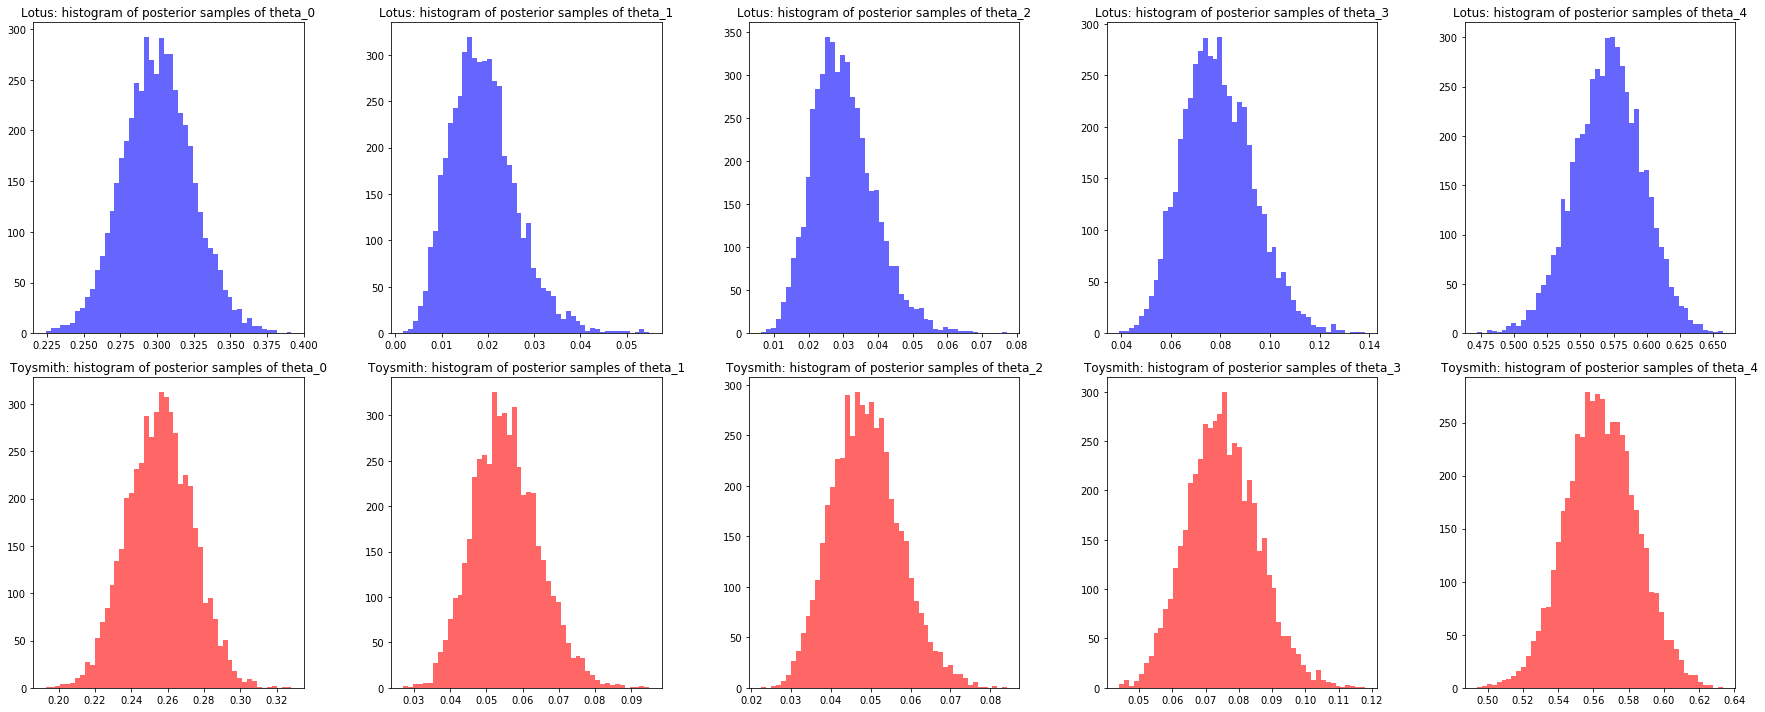

In [61]:
samples = 5000
#sample from the lotus posterior
lotus_posterior_samples = np.random.dirichlet([110, 7, 11, 29, 209], size=samples)
#sample from the toysmith posterior
toysmith_posterior_samples = np.random.dirichlet([157, 34, 30, 46, 346], size=samples)

#visualize these posterior samples
fig, ax = plt.subplots(2, 5, figsize=(25, 10))
for i in range(5):
    ax[0, i].hist(lotus_posterior_samples[:, i], bins=50, color='blue', alpha=0.6)
    ax[0, i].set_title('Lotus: histogram of posterior samples of theta_{}'.format(i))
for i in range(5):
    ax[1, i].hist(toysmith_posterior_samples[:, i], bins=50, color='red', alpha=0.6)
    ax[1, i].set_title('Toysmith: histogram of posterior samples of theta_{}'.format(i))
plt.tight_layout()
plt.show()

We see that the mode of the posterior samples closely resemble the MAP estimates we derived analytically for each product.

4. **(The Posterior Mean Estimate)** Analytically or empirically compute the posterior mean estimate of $\theta$ for each product. How do these estimates compare with the MAP estimates and the MLE?

**Solution:** The means of our Dirichlet distribution is given by
$$
\frac{\alpha_i}{\sum_{i=1}^5 \alpha_i}.
$$
Thus, we can compute
\begin{aligned}
\theta^{\text{lotus}}_{\text{Post Mean}} &= [0.3, 0.019, 0.03, 0.079, 0.57]\\
\theta^{\text{toysmith}}_{\text{Post Mean}} &= [0.26, 0.055, 0.049, 0.075, 0.56]
\end{aligned}

These estimates are very similar to the MAP estimates and are quite different from the MLE.

Again, we can empirically estimate the posterior mean. That is, we sample from the posterior and compute the mean of those samples.

In [66]:
lotus_posterior_mean = lotus_posterior_samples.mean(axis=0)
toysmith_posterior_mean = toysmith_posterior_samples.mean(axis=0)

print('lotus', lotus_posterior_mean)
print('toysmith', toysmith_posterior_mean)

lotus [0.30059143 0.01906971 0.03011557 0.0791401  0.57108319]
toysmith [0.25569328 0.05556726 0.04888619 0.07524339 0.56460989]


Again, we see that the empirical estimates of the posterior means are similar to the values we derived analytically.

5. **(The Posterior Predictive Estimate)** Sample 1000 rating vectors from the posterior predictive for each product, using the $\alpha$'s you chose in Problem 1. Use the average of the posterior predictive samples to estimate $\theta$. How do these estimates compare with the MAP, MLE, posterior mean estimate of $\theta$?

**Solution:** To sample from the posterior predictive, we sample $N$ samples of $\theta$ from the posterior. Each sample of $\theta$ parametrizes a distinct binomial model. We sample an outcome $Y$ from each of these models. Taking the average value of these samples, we can estimate the percentage of 1-star reviews, 2-star reviews etc.

In [74]:
lotus_posterior_pred = np.array([np.random.multinomial(160, sample, size=1)[0] for sample in lotus_posterior_samples])
toysmith_posterior_pred = np.array([np.random.multinomial(410, sample, size=1)[0] for sample in toysmith_posterior_samples])

lotus_posterior_pred_mean = lotus_posterior_pred.mean(axis=0)
toysmith_posterior_pred_mean = toysmith_posterior_pred.mean(axis=0)

print('lotus', lotus_posterior_pred_mean)
print('toysmith', toysmith_posterior_pred_mean)

lotus [48.1108  3.0092  4.8118 12.7128 91.3554]
toysmith [104.9284  22.7914  19.973   30.7678 231.5394]


In [76]:
lotus_posterior_pred_mean_percent = lotus_posterior_pred_mean / lotus_posterior_pred_mean.sum()
toysmith_posterior_pred_mean_percent = toysmith_posterior_pred_mean / toysmith_posterior_pred_mean.sum()

print('lotus', lotus_posterior_pred_mean_percent)
print('toysmith', toysmith_posterior_pred_mean_percent)

lotus [0.3006925  0.0188075  0.03007375 0.079455   0.57097125]
toysmith [0.25592293 0.05558878 0.04871463 0.07504341 0.56473024]


It looks like that the percentages of star ratings estimated from the posterior predictive are very similar to the MAP and posterior mean estimates of the $\theta$'s of the two products!

6. **(Model Evaluation)** Compute the 95% credible interval of $\theta$ for each product (*Hint: compute the 95% credible interval for each $\theta_i$, $i=1, \ldots, 5$*). For which product is the posterior mean and MAP estimate more reliable and why? 

**Solution:** just as in Homework #0, we empirically compute the 95% credible interval for $\theta$ by sampling from the posterior and then taking the empirical 95% interval of the samples. Again, we estimate the interval for $\theta$ by estimating the 95% credible interval of each $\theta_i$ from the posterior marginal distribution. 

Note that this is again a simplification. The multivariate version of $n\%$ credible intervals is *credible region*, a region in the parameter space over which contains n% of the pdf's probability mass. A 95% confidence region for a general joint posterior distribution may not be a box but, rather, a complex shape. Our approximation of the 95% confidence region by the confidence intervals of the marginal posterior distributions defines a bounding box around this region and, in general, may be wider than necessary.

In [82]:
lotus_lb = np.percentile(lotus_posterior_samples, 2.5, axis=0)
lotus_ub= np.percentile(lotus_posterior_samples, 97.5, axis=0)

toysmith_lb = np.percentile(toysmith_posterior_samples, 2.5, axis=0)
toysmiths_ub = np.percentile(toysmith_posterior_samples, 97.5, axis=0)

print('lotus 2.5%', lotus_lb)
print('lotus 97.5%', lotus_ub)
print('\n')
print('toysmith 2.5%', toysmith_lb)
print('toysmith 97.5%', toysmiths_ub)

lotus 2.5% [0.25461125 0.00752224 0.01501516 0.05435051 0.5195699 ]
lotus 97.5% [0.34852501 0.03491268 0.05023371 0.10873433 0.62070921]


toysmith 2.5% [0.22173339 0.03899756 0.03335997 0.05535704 0.52613722]
toysmith 97.5% [0.29061782 0.07513756 0.06715502 0.09730883 0.60483596]


We see that the credible intervals for both products have comparible width -- i.e. no model is more "certain" about $\theta$ than the other.

Since the confidence intervals (especially for the 5-star probability and the 1-star probability) overlap a great deal it may be unreasonble to use our point estimates (MAP, MLE etc) to rank the two products.

## Part III: Comparison



---

## Part III: Broader Impact Analysis

Starting in 2020, major machine learning conferences are beginning to ask authors as well as reviewers to explicitly consider the broader impact of new machine learning methods. To properly evaluate the potential good or harm that a piece of technology (AI or not) can do to the general public, we need to be aware that no technology is deployed in ideal conditions or in perfectly neutral contexts. In order to assess the potential broader impact of technology, we need to analyze the social systems/institutions of which these technologies will become a part.

To help you analyze the broader impact of your technology, begin by considering the following questions:

I. Identify the relevant socio-technical systems
  - In what social, political, economic system could the tech be deployed?
  - How would the tech be used in these systems (what role will it take in the decision making processes)?<br><br>
  
II. Identify the stakeholders
  - Who are the users?
  - Who are the affected communities (are these the users)?
  
    ***Hint:*** users are typically decision makers who will use the technology as decision aids (e.g. doctors), whereas affected communities may be folks who are impacted by these decisions but who are not represented in the decision making process (e.g. patients).<br><br>
    
III. What types of harm can this tech do?
  - What kinds of failures can this tech have?
  - What kinds of direct harm can these failures cause?
  - What kinds of harm can the socio-technical system cause?
  
    ***Hint:*** many technical innovations have niche applications, they may sit in a long chain of decision making in a complex system. As such, it may seem, at first glance, that these technologies have no immediate real-life impact. In these cases, it’s helpful to think about the impact of the entire system and then think about how the proposed innovations aid, hamper or change the goals or outcomes of this system.<br><br>
    
IV. What types of good can this tech do?
  - What kinds of needs do these users/communities have?
  - What kinds of constraints do these users/communities have?


1. **(Impact)** Analyze the broader impact of models of product popularity/quality when used for ranking. Specifically, focus on anticipating ways these models can interact with other components of the decision systems in which they will be deployed, identifying end-users, affected communities as well as anticipating the effects (positive and negative) on affected communities (in particular, does the model have the same effect on all subpopulations in the affected communities?).

**Solution:** Here the end-user of your ranking system would be Amazon but the folks affected by the ranking decisions would be businesses that sell products on Amazon (many of whom are small businesses!), as well as Amazon customers. Poor or inefficient ranking system not only hampers the ability of businesses (especially small businesses running on a small profit margin) to thrive, it can also turn-off customers if they find it time consuming to locate the products that they want. Done well, ranking systems can faciliate the connection between consumers and merchants, which can serve the interest of both communities. (Although perhaps this doesn't address Amazon's sometime problemmatic relationship with its merchants or the type of unfair competition Amazon presents to brick-and-mortar community businesses.)

This is an example of how you might approach the impact analysis, many of you did a much more thorough and thoughtful job on your in-class exercises.


2. **(Comparison of Ranking Systems)** 

  Recall that on Amazon, the first customer review statistic displayed for a product is the average rating. What is potentially problemmatic with ranking products based on the average customer rating?

  Which point estimate (MAP, MLE, posterior mean or posterior predictive estimate) of $\theta$, if any, would you feel choose to rank the two Amazon products? Why? 

  *Hint: think about which of these estimates are equivalent (if any). If they are not equivalent, what are the special properties of each estimate? What aspect of the data or the model is each estimate good at capturing?*
  
   **Note:** we're not looking for "the correct answer" here. We are looking for a sound decision based on a statistically correct interpretation of your models.

**Solution:** 

There are two immediate issues with using an "average star rating" to rank products:

1. An average star rating can obscure the difference between a mediocre product (one that receives 100 two or three star reviews) and a polarizing product (one that receives 50 five star reviews and 50 one star reviews). We can, no doubt, all think of instances where distinguishing between a mediocre product and a polarizing product makes all the difference in the world (to consumers).

2. Another problem with averaging star ratings is a general statistical weakness of using averages to rate things. We've seen this problem pop up in many previous examples, when small sample sizes heavily skew averages towards extreme values.

As many of you pointed out in your in-class exercises, since MLE's can overfit when the number of observations is limited, ranking by MLE means you might end up recommending products that have only a few but positive reviews but may not be actually be a true crowd pleaser. On the other hand, your choice of priors has the highest impact on products with fewer reviews, thus by choosing a conservative prior you might lower the rankings of new or small businesses that have the potential to reach a broader audience. In this case, your choice of model (MLE or Bayesian point estimate, conservative or optimistic prior) might depend on what outcome you want to priortize, understanding that you may not be able to accomplish all goals.

Here we're looking for you to articulate a goal and to choose a model that would best serve that goal.

Finally, the main goal of Amazon is to promote products that will sell, where as the goal of each seller might be to sell as much product as possible. In this particular case, there are ways to align the interests of these two groups. For example, one can highlight new but trending products (with fewer but raving reviews) in a list that is separate from the extremely popular products. Products can also be highlighted through themed lists ("flash sale", "editor's picks", "hidden gems", "local businesses", "women-owned", "black-owned" etc). Modeling user archetypes and factoring previous user choices are common ways to move the suggestions of recommender systems from generically popular items. These are solutions that many of you have suggested in your in-class exercises and that have already been implemented in platforms like Amazon, Netflix etc.


This is an example of how you might approach the impact analysis, many of you did a much more thorough and thoughtful job on your in-class exercises.
